In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import seaborn as sns

In [2]:
data = pd.read_csv("Queries.csv")

In [3]:
# question1

null_values = data.isnull().sum()
column_info = data.info()
descriptive_stats = data.describe()

null_values, column_info, descriptive_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


(Top queries    0
 Clicks         0
 Impressions    0
 CTR            0
 Position       0
 dtype: int64,
 None,
           Clicks   Impressions     Position
 count  1000.0000   1000.000000  1000.000000
 mean    172.2750   1939.466000     3.985930
 std     281.0221   4856.702605     2.841842
 min      48.0000     62.000000     1.000000
 25%      64.0000    311.000000     2.010000
 50%      94.0000    590.500000     3.120000
 75%     169.0000   1582.750000     5.342500
 max    5223.0000  73380.000000    28.520000)

In [4]:
# question2

# convert the CTR column from percentage string to float
data['CTR'] = data['CTR'].str.rstrip('%').astype(float)

print(data.head())


                                 Top queries  Clicks  Impressions    CTR  \
0                number guessing game python    5223        14578  35.83   
1                        thecleverprogrammer    2809         3456  81.28   
2           python projects with source code    2077        73380   2.83   
3  classification report in machine learning    2012         4959  40.57   
4                      the clever programmer    1931         2528  76.38   

   Position  
0      1.61  
1      1.02  
2      5.94  
3      1.28  
4      1.09  


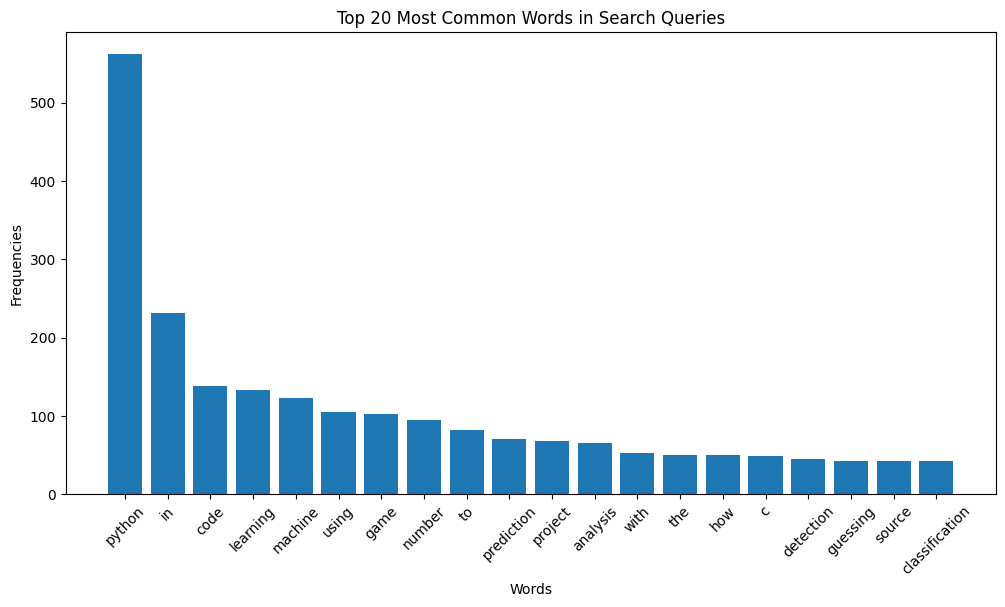

In [5]:
# question3

# function to clean and split queries
def clean_and_split(query):
    query = query.lower()  
    query = re.sub(r'[^a-z0-9\s]', '', query)  # remove punctuation and special characters
    words = query.split()  # split into words
    return words

# counting frequency of each word
word_counter = Counter()
for query in data['Top queries']:
    words = clean_and_split(query)
    word_counter.update(words)

# get most common words
common_words = word_counter.most_common(20)

words, frequencies = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 20 Most Common Words in Search Queries')
plt.xticks(rotation=45)
plt.show()


Top queries by clicks:
                                 Top queries  Clicks  Impressions    CTR  \
0                number guessing game python    5223        14578  35.83   
1                        thecleverprogrammer    2809         3456  81.28   
2           python projects with source code    2077        73380   2.83   
3  classification report in machine learning    2012         4959  40.57   
4                      the clever programmer    1931         2528  76.38   
5        standard scaler in machine learning    1559         7292  21.38   
6                               aman kharwal    1490         5752  25.90   
7                python turtle graphics code    1455        13585  10.71   
8      python game projects with source code    1421         4946  28.73   
9        82 python projects with source code    1343         3562  37.70   

   Position  
0      1.61  
1      1.02  
2      5.94  
3      1.28  
4      1.09  
5      1.53  
6      3.75  
7      4.60  
8      2.23  


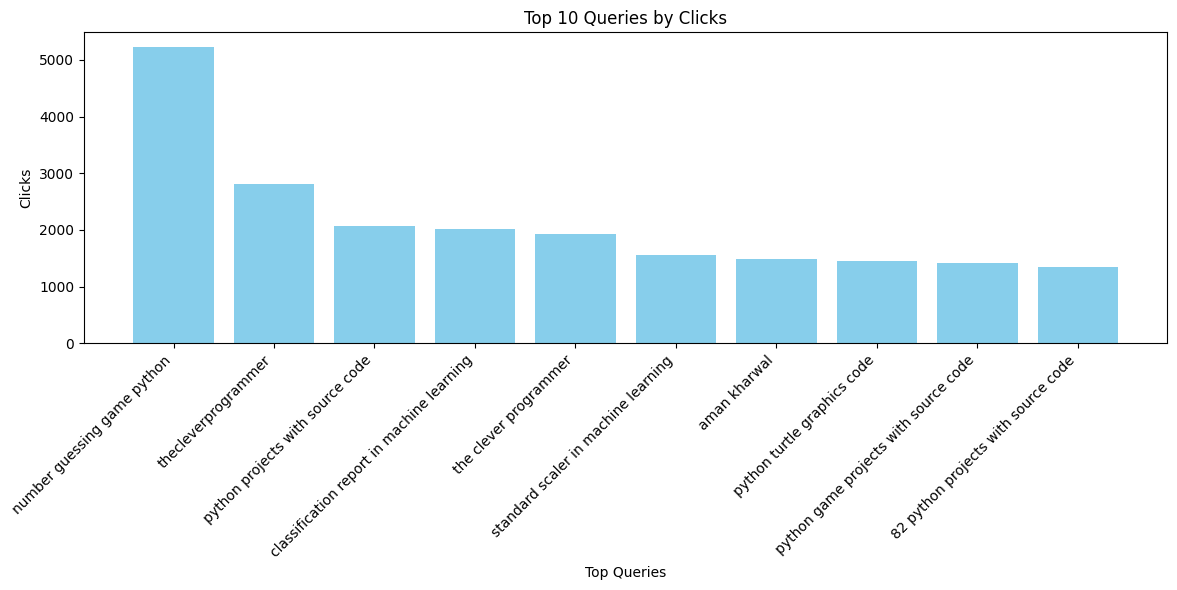

Top queries by impressions:
                          Top queries  Clicks  Impressions   CTR  Position
2    python projects with source code    2077        73380  2.83      5.94
82                           r2 score     367        56322  0.65      9.33
34           machine learning roadmap     708        42715  1.66      8.97
21              classification report     933        39896  2.34      7.53
232                    standardscaler     177        39267  0.45     10.23
91     facebook programming languages     346        36055  0.96      1.58
15         rock paper scissors python    1111        35824  3.10      7.19
36                  pandas datareader     662        26663  2.48      5.82
180             classification_report     210        24917  0.84      8.34
54                  pandas_datareader     489        24689  1.98      6.35


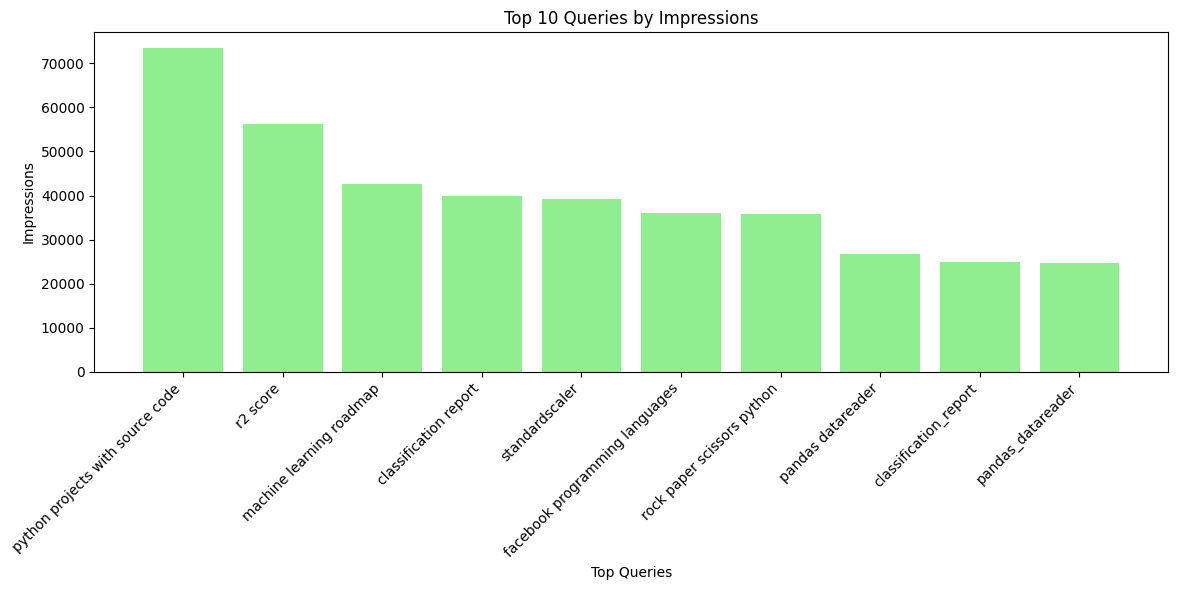

In [6]:
# question4

# top queries by clicks
top_queries_by_clicks = data.sort_values(by='Clicks', ascending=False).head(10)
print("Top queries by clicks:")
print(top_queries_by_clicks)

plt.figure(figsize=(12, 6))
plt.bar(top_queries_by_clicks['Top queries'], top_queries_by_clicks['Clicks'], color='skyblue')
plt.xlabel('Top Queries')
plt.ylabel('Clicks')
plt.title('Top 10 Queries by Clicks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# top queries by impressions
top_queries_by_impressions = data.sort_values(by='Impressions', ascending=False).head(10)
print("Top queries by impressions:")
print(top_queries_by_impressions)

plt.figure(figsize=(12, 6))
plt.bar(top_queries_by_impressions['Top queries'], top_queries_by_impressions['Impressions'], color='lightgreen')
plt.xlabel('Top Queries')
plt.ylabel('Impressions')
plt.title('Top 10 Queries by Impressions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top queries by CTR:
                                           Top queries  Clicks  Impressions  \
928                           the cleverprogrammer.com      53           62   
927                          the clever programmer.com      53           64   
1                                  thecleverprogrammer    2809         3456   
732               the clever programmer python project      66           84   
307    the clever programmer machine learning projects     140          181   
4                                the clever programmer    1931         2528   
964               python program to send otp to mobile      51           72   
95                        the card game code in python     341          509   
771  write a python program that calculates number ...      63           95   
137  python program to calculate number of seconds ...     270          410   

       CTR  Position  
928  85.48      1.00  
927  82.81      1.00  
1    81.28      1.02  
732  78.57      1.

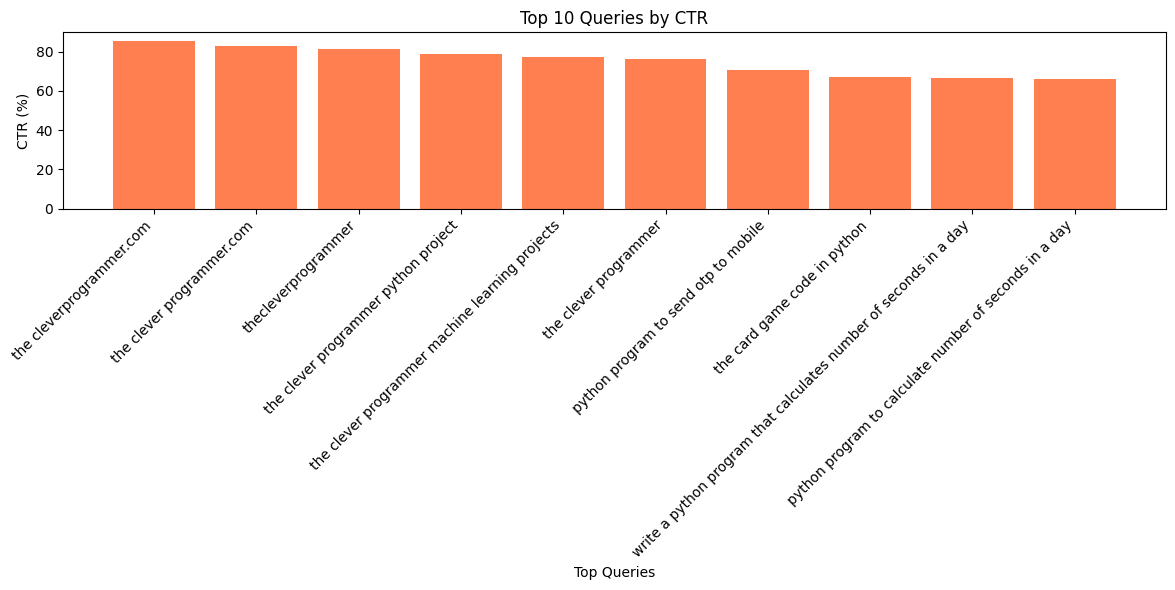

Bottom queries by CTR:
                        Top queries  Clicks  Impressions   CTR  Position
929                   python turtle      52        18228  0.29     18.75
232                  standardscaler     177        39267  0.45     10.23
423   classification report sklearn     109        22969  0.47      9.08
544                 standard scaler      86        17800  0.48      9.68
981                r2 score sklearn      49         7871  0.62      7.92
82                         r2 score     367        56322  0.65      9.33
536              python source code      87        12983  0.67     11.97
684                 turtle graphics      71        10096  0.70     10.05
664  online payment fraud detection      73        10368  0.70     16.88
858          water quality analysis      56         7359  0.76     27.56


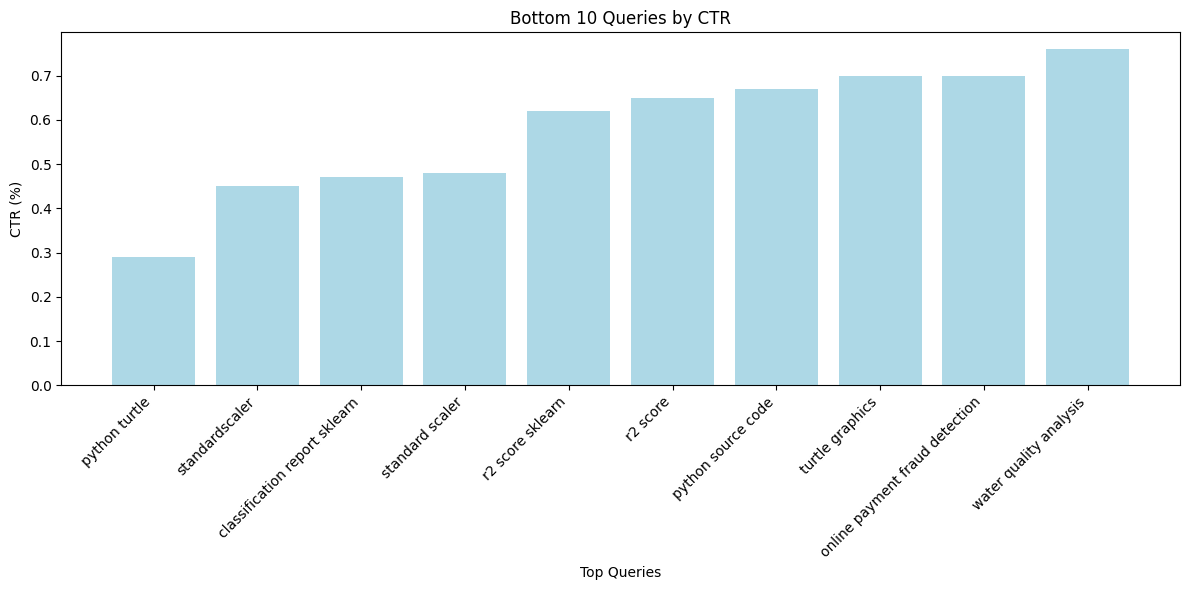

In [7]:
# question5

# queries with the highest CTRs
top_queries_by_ctr = data.sort_values(by='CTR', ascending=False).head(10)
print("Top queries by CTR:")
print(top_queries_by_ctr)

plt.figure(figsize=(12, 6))
plt.bar(top_queries_by_ctr['Top queries'], top_queries_by_ctr['CTR'], color='coral')
plt.xlabel('Top Queries')
plt.ylabel('CTR (%)')
plt.title('Top 10 Queries by CTR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# queries with the lowest CTRs
bottom_queries_by_ctr = data.sort_values(by='CTR', ascending=True).head(10)
print("Bottom queries by CTR:")
print(bottom_queries_by_ctr)

plt.figure(figsize=(12, 6))
plt.bar(bottom_queries_by_ctr['Top queries'], bottom_queries_by_ctr['CTR'], color='lightblue')
plt.xlabel('Top Queries')
plt.ylabel('CTR (%)')
plt.title('Bottom 10 Queries by CTR')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Correlation matrix:
               Clicks  Impressions       CTR  Position
Clicks       1.000000     0.377256  0.106758 -0.111582
Impressions  0.377256     1.000000 -0.331126  0.357921
CTR          0.106758    -0.331126  1.000000 -0.728320
Position    -0.111582     0.357921 -0.728320  1.000000


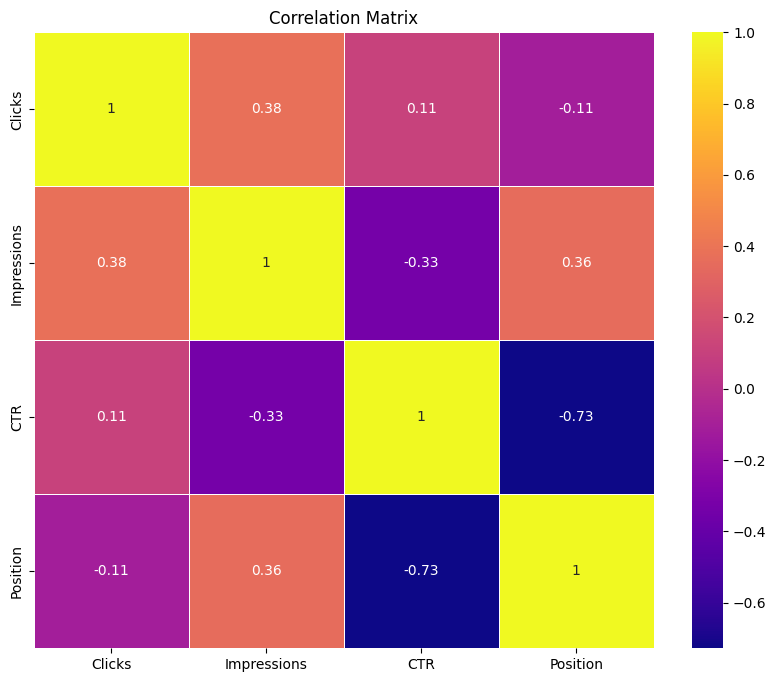

In [8]:
# question6

# calculate the correlation matrix
correlation_matrix = data[['Clicks', 'Impressions', 'CTR', 'Position']].corr()
print("Correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [9]:
# question7

from sklearn.ensemble import IsolationForest

# select relevant features for anomaly detection
features = data[['Clicks', 'Impressions', 'CTR', 'Position']]

# initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# fit the model to the data
data['anomaly'] = isolation_forest.fit_predict(features)

# display anomalies
anomalies = data[data['anomaly'] == -1]
print("Anomalies detected:")
print(anomalies)


Anomalies detected:
                                      Top queries  Clicks  Impressions    CTR  \
0                     number guessing game python    5223        14578  35.83   
1                             thecleverprogrammer    2809         3456  81.28   
2                python projects with source code    2077        73380   2.83   
3       classification report in machine learning    2012         4959  40.57   
4                           the clever programmer    1931         2528  76.38   
5             standard scaler in machine learning    1559         7292  21.38   
6                                    aman kharwal    1490         5752  25.90   
7                     python turtle graphics code    1455        13585  10.71   
8           python game projects with source code    1421         4946  28.73   
9             82 python projects with source code    1343         3562  37.70   
10                        guess the number python    1287         4569  28.17   
11      